# Assessing credit risk with machine learning methods

If you've ever applied for a mortgage, you know that financial firms process your information before making a decision. This is because giving you a mortgage can have a serious financial impact on their business. But how do they make a decision? In this assignment, you will have to prepare mortgage application data. After that, you will apply machine learning and business rules to reduce risk and ensure profitability. You will use a large set of mortgage data that emulates mortgage applications. You will be required to write the code in the boxes after each commented part. 

## Import and clean the data

As usual, the first step is to import and clean }the data. 

### Import the data

Ex 1: You have to first import the ***Data.csv*** file and consider the 'Id' column as the index of the dataframe. Hint: you need the ***pandas*** package to import the data. Once the data are uploaded, to have an idea of the data frame you are required to show the first 10 rows. 

In [702]:
import pandas as pd 
# read the csv data using pd.read_csv function, define the 'id' as the index
df = pd.read_csv('Data.csv')
df.set_index('id', inplace=True)
print(df.head(10))

    loan_amnt  int_rate  installment grade emp_length home_ownership  \
id                                                                     
1       18600     10.99       608.86     B    6 years           RENT   
2        2000     17.97        72.28     D    4 years       MORTGAGE   
3       12000     12.29       400.24     C  10+ years            OWN   
4       16000     19.42       589.90     D    7 years           RENT   
5       22525     16.02       548.01     C  10+ years       MORTGAGE   
6       19000     16.99       472.10     D     1 year           RENT   
7        6000      9.17       191.28     B  10+ years            OWN   
8       17000      5.32       511.96     A  10+ years       MORTGAGE   
9       26375     24.50       766.43     F  10+ years       MORTGAGE   
10      10000     18.45       256.39     D    4 years           RENT   

    annual_inc  loan_status    dti  delinq_2yrs  ...  total_rec_late_fee  \
id                                               ...       

Ex 2: The variable we want to predict is ***loan_status***. In particular, we want to predict the probability that a mortgage is *Charged Off* from the bank book. Before doing anything, we need to check for the presence of missing data. Notice that the variable ***loan_status*** is a categorical variable. 

In [669]:
import pandas as pd

# read the csv file
df = pd.read_csv('Data.csv', index_col='id')

# check for missing data
print(df.isnull().sum())

# create a binary target variable
df['charged_off'] = (df['loan_status'] == 'Charged Off').astype(int)

# display the first 10 rows of the dataframe
print(df.head(10))


loan_amnt                          0
int_rate                           0
installment                        0
grade                              0
emp_length                     14611
home_ownership                     0
annual_inc                         0
loan_status                        0
dti                              180
delinq_2yrs                        5
inq_last_6mths                     5
mths_since_last_delinq        115840
open_acc                           5
pub_rec                            5
revol_bal                          0
revol_util                       190
total_acc                          5
total_pymnt                        0
total_pymnt_inv                    0
total_rec_prncp                    0
total_rec_int                      0
total_rec_late_fee                 0
recoveries                         0
collection_recovery_fee            0
last_pymnt_amnt                    0
collections_12_mths_ex_med        16
application_type                   0
a

Ex 3: Do we have any missing value for the ***loan_status*** variable? If yes, we should fix it by replacing with the most common category. If not, we should keep it as it is. To avoid any confusion in workflow. Let's save a back-up copy of the dataframe so that we can reuse it if something goes wrong. 

In [670]:
import pandas as pd

# read the csv file
df = pd.read_csv('Data.csv', index_col='id')

# check for missing data
print(df.isnull().sum())

# create a binary target variable
df['charged_off'] = (df['loan_status'] == 'Charged Off').astype(int)

# check for missing values in the new column
print(df['charged_off'].isnull().sum())

# replace missing values with the most common category
if df['charged_off'].isnull().sum() > 0:
    df['charged_off'].fillna(df['charged_off'].mode()[0], inplace=True)

# save a backup copy of the dataframe
df_backup = df.copy()

# display the first 10 rows of the dataframe
print(df.head(10))


loan_amnt                          0
int_rate                           0
installment                        0
grade                              0
emp_length                     14611
home_ownership                     0
annual_inc                         0
loan_status                        0
dti                              180
delinq_2yrs                        5
inq_last_6mths                     5
mths_since_last_delinq        115840
open_acc                           5
pub_rec                            5
revol_bal                          0
revol_util                       190
total_acc                          5
total_pymnt                        0
total_pymnt_inv                    0
total_rec_prncp                    0
total_rec_int                      0
total_rec_late_fee                 0
recoveries                         0
collection_recovery_fee            0
last_pymnt_amnt                    0
collections_12_mths_ex_med        16
application_type                   0
a

### Cleaning the data

Ex 4: There are some other variable in which we do have many *NaN* though. We should clean the data to make sure there will not be any issue when predicting the mortgages which have been charged off. Let us do the cleaning as follows:

- Step 1: Take out from the dataset those variables in which we have more than 10 missing observations. 
- Step 2: Drop only the missing observations for those variables in which we have less than 10 *NaN*. 

In [671]:
# Step 1: Take out from the dataset those variables in which we have more than 10 missing observations.
df = df.loc[:, df.isnull().sum() <= 10]
print(df)

# Step 2: Drop only the missing observations for those variables in which we have less than 10 NaN.
df = df.dropna()
print(df)
    

        loan_amnt  int_rate  installment grade home_ownership  annual_inc  \
id                                                                          
1           18600     10.99       608.86     B           RENT     80000.0   
2            2000     17.97        72.28     D       MORTGAGE     55400.0   
3           12000     12.29       400.24     C            OWN     60000.0   
4           16000     19.42       589.90     D           RENT     64000.0   
5           22525     16.02       548.01     C       MORTGAGE     94080.0   
...           ...       ...          ...   ...            ...         ...   
226063       5000      7.21       154.87     A           RENT     46000.0   
226064      35000     21.85       963.68     D       MORTGAGE     70000.0   
226065       1200     18.99        43.99     D           RENT     90000.0   
226066      12000      8.90       381.04     A            OWN     35000.0   
226067      20000      8.24       628.95     B           RENT    200000.0   

Ex 5: Notice the variable of interest ***loan_status*** is a categorical variable, which means is a string. In order to run our classification algorithms we need to construct a quantitative (binary) variable which takes value 1 if the loan status is *charged off* and zero otherwise. Hint: we need the ***numpy*** package to do that. 

In [672]:
import numpy as np

loan_status = np.array(['Data.csv'])

binary_var = np.where(loan_status=='Charged Off',1,0)
print(binary_var)


import numpy as np
df["loan_dummy"]=np.where(df["loan_status"] == 'Charged Off',1,0)
print(df)



[0]
        loan_amnt  int_rate  installment grade home_ownership  annual_inc  \
id                                                                          
1           18600     10.99       608.86     B           RENT     80000.0   
2            2000     17.97        72.28     D       MORTGAGE     55400.0   
3           12000     12.29       400.24     C            OWN     60000.0   
4           16000     19.42       589.90     D           RENT     64000.0   
5           22525     16.02       548.01     C       MORTGAGE     94080.0   
...           ...       ...          ...   ...            ...         ...   
226063       5000      7.21       154.87     A           RENT     46000.0   
226064      35000     21.85       963.68     D       MORTGAGE     70000.0   
226065       1200     18.99        43.99     D           RENT     90000.0   
226066      12000      8.90       381.04     A            OWN     35000.0   
226067      20000      8.24       628.95     B           RENT    200000.



### Data visualization 

Ex 6: Before moving to the model estimation and assessment part, we want to have a sense of the data we are dealing with. For instance, let us look at the distribution of the loan amount (**loan_amnt**) and the interest rate (**int_rate**) by borrowers credit score (**grade**). The credit score goes from A (high grade) to F (low grade). Hint: use the ***seaborn*** and the ***matplotlib*** packages. 


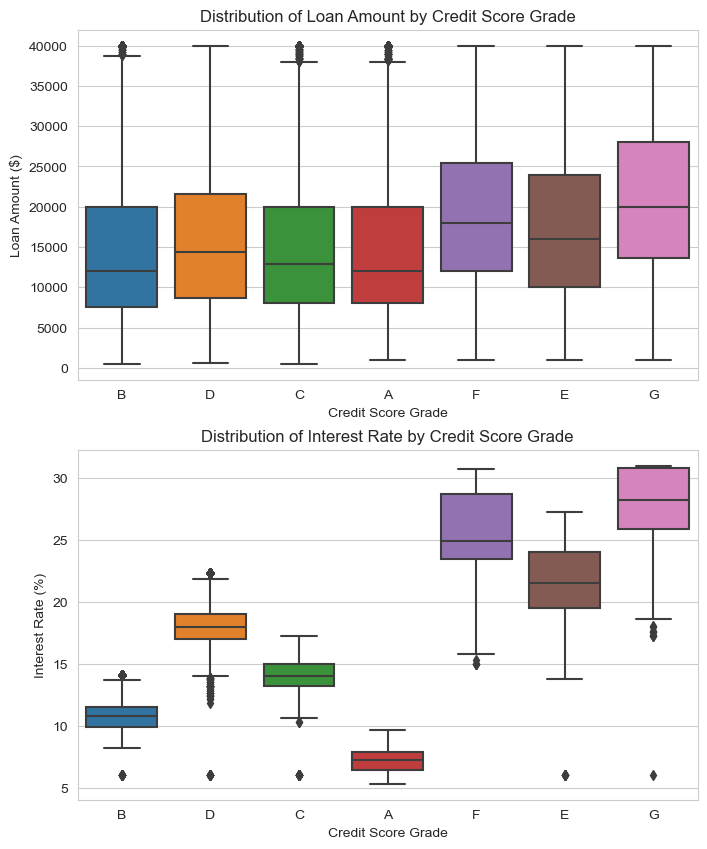

In [701]:
import seaborn as sns
import matplotlib.pyplot as plt
 
# Set plot style
sns.set_style('whitegrid')


fig, axes = plt.subplots(nrows=2, figsize=(8, 10))
sns.boxplot(x="grade", y="loan_amnt", data=df, ax=axes[0])
sns.boxplot(x="grade", y="int_rate", data=df, ax=axes[1])

# Add titles and labels to the plots
axes[0].set_title("Distribution of Loan Amount by Credit Score Grade")
axes[1].set_title("Distribution of Interest Rate by Credit Score Grade")
axes[0].set_ylabel("Loan Amount ($)")
axes[1].set_ylabel("Interest Rate (%)")
axes[0].set_xlabel("Credit Score Grade")
axes[1].set_xlabel("Credit Score Grade")

# Display the plots
plt.show()
  

 Do you see any specific patterns? Briefly discuss the results.  

### Sample splitting 

Ex 7: Before estimating the logistic regression and other models, we need to split the sample in *training* vs *testing* observations. Let us consider 70% of the total data as training sample and the remaining as testing period. Notice we are dealing with a binary target variable, so we need to balance out the splitting accordingly. 

Notice the variables we want to use for forecasting are:

- Loan amount (**loan_amnt**)
- Interest rate (**int_rate**)
- Annual income (**annual_inc**)
- Total mortgage payment (**total_pymnt**)
- Mortgage installment (**installment**)
- Total paied in interest rates (**total_rec_int**)
- Last payment amount (**last_pymnt_amnt**)

We can construct our matrix of predictors *X* by taking these variables from the data frame. Recall that the variable of interest here is the binary variable **loan_dummy**. 

In [675]:
from sklearn.model_selection import train_test_split
 
# Define target variable and predictor variables
y = df['loan_dummy'] 
X = df[['loan_amnt', 'int_rate', 'annual_inc', 'total_pymnt', 'installment', 'total_rec_int', 'last_pymnt_amnt']] 

# Split the data into training and testing sets, with 70% for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

 

In [676]:
X_train, X_test, y_train, y_test


(        loan_amnt  int_rate  annual_inc   total_pymnt  installment  \
 id                                                                   
 118424      12300     19.72     60000.0  15120.962630       455.36   
 7121        18000     18.99     72000.0   7242.860000       466.84   
 151692       7000     20.89    150000.0   1308.580000       263.34   
 137674       8400     19.03     37440.0   2924.770000       308.04   
 147541      12000      5.32     65000.0  12758.423910       361.38   
 ...           ...       ...         ...           ...          ...   
 163102       9600     13.56     32000.0    985.420000       326.06   
 88334        4000     12.29    180000.0   4808.351772       133.42   
 198636       9600     15.31     40000.0  12032.835010       334.25   
 127597      10000     16.02     67000.0   3631.550000       243.29   
 175334      10000     11.49     54000.0   8556.760000       329.72   
 
         total_rec_int  last_pymnt_amnt  
 id                              

#### Estimating a logistic regression 

Ex 8: We now estimate a logistic regression without shrinking the parameters. We estimate the regression using the *training* set of observations. 

In [677]:

from sklearn.linear_model import LogisticRegression
 
# Create an instance of the logistic regression model
log_reg = LogisticRegression(penalty='none')

# Fit the logistic regression model to the training data
log_reg.fit(X_train, y_train)

# Predict the labels of the test set using the trained model
y_pred = log_reg.predict(X_test)



Ex 9: We can now produce the forecast based on the observations in the testing sample. 

In [678]:
# Use the trained model to make predictions on the test data
y_pred = log_reg.predict(X_test)

# Print the predicted labels for the first 10 observations
print(y_pred[:10])


[0 0 0 0 0 0 0 0 0 0]


Ex 10a: Calculate the confusion matrix

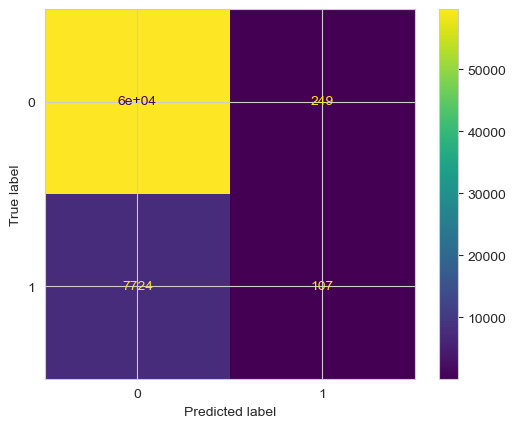

In [679]:
# Confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_reg.classes_)
disp.plot()
plt.show()

In [680]:
# Confusion matrix

from sklearn import metrics
  
print(metrics.confusion_matrix(y_test,y_pred))
 

[[59739   249]
 [ 7724   107]]


Can you give a comment on the confusion matrix? 

Ex 10b: Calculate now the forecast from a "no-skill" prediction, that is just taking the majority class. 

In [681]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

 # generate the predicted probabilities from the logistic regression
y_pred_prob = log_reg.predict_proba(X_test)[:,1]
print(y_pred_prob[:10])


[2.81007747e-08 3.41620017e-01 1.54870776e-01 9.91161204e-05
 4.18022778e-14 2.48560045e-02 5.89749586e-09 3.34838507e-01
 3.22632080e-02 1.27787849e-09]


In [682]:
# Calculate the no-skill forecast
majority_class = y_train.value_counts().idxmax()
y_pred_no_skill = np.full_like(y_test, fill_value=majority_class)

# Print the no-skill prediction for the first 10 observations
print(y_pred_no_skill[:10])
 

[0 0 0 0 0 0 0 0 0 0]


In [683]:
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Precision: 0.301
Recall: 0.014
Accuracy: 0.882
F1 Score: 0.026


Ex 10c: Now compare the logistic regression with the "no-skill" prediction based on the ROC curve. Hint: you need to use the **sklearn.metrics** and the **matplotlib.pyplot** packages. 

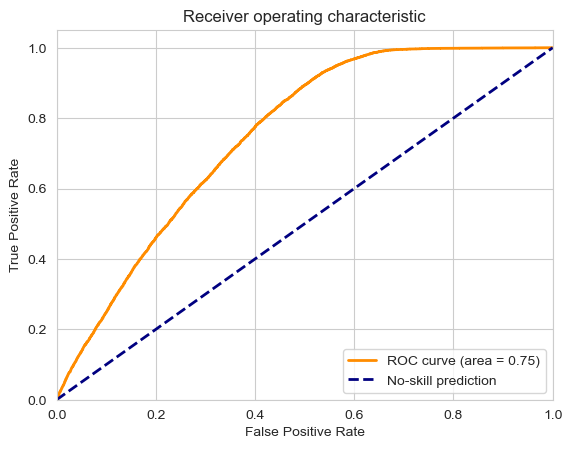

In [684]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Fit the logistic regression model and obtain predicted probabilities
log_reg.fit(X_train, y_train)
y_prob = log_reg.predict_proba(X_test)[:, 1]

# Calculate false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve with no-skill prediction line
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='No-skill prediction')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


Can you comment on the results? 

Answer:
The ROC curve shows the performance of the logistic regression model in terms of the true positive rate (sensitivity) versus the false positive rate (1-specificity). The area under the curve (AUC) is a measure of the overall performance of the model, where a value of 0.5 indicates random guessing and a value of 1.0 indicates perfect classification.

In this case, the AUC is 0.75, which indicates that the model has some predictive power but there is room for improvement. The ROC curve also shows that the model is not far from the no-skill prediction line, which indicates that the model is not performing significantly better than random guessing. Overall, the model may benefit from additional feature engineering or the use of more sophisticated machine learning algorithms.

## Estimating a classification tree

We now implement a classification tree to forecast mortgage defaults. We implement two different procedures. 

- 1. Classification tree with **max_depth** fixed
- 2. Classificarion tree with **max_depth** estimated by k-fold cross validation. 

Ex 11: Let start with a simple classification tree:

In [685]:
from sklearn.tree import DecisionTreeClassifier

#instantiate a DecisionTreeclassifier with fixed max_depth=3
clf_tree = DecisionTreeClassifier(max_depth=3, random_state=42)

# Fit the classifier to the training data
clf_tree.fit(X_train, y_train)

# Predict the labels of the test set using the trained model
y_pred = tree.predict(X_test)  
    
 

In [686]:
 precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 score: {:.2f}".format(f1))
print("Accuracy: {:.2f}".format(accuracy))

Precision: 0.78
Recall: 0.88
F1 score: 0.83
Accuracy: 0.88


Ex 12: Now compare the classification tree against the logistic regression and the "no-skill" prediction estimated above based on the ROC curve.

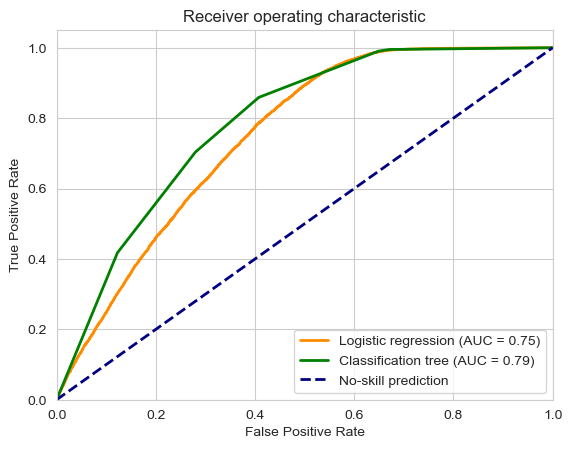

In [688]:
# generate the predicted probabilities from the logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Fit the logistic regression model and obtain predicted probabilities
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_prob_lr = logreg.predict_proba(X_test)[:, 1]

# Fit the classification tree with max_depth=3 and obtain predicted probabilities
clf_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_tree.fit(X_train, y_train)
y_prob_tree = clf_tree.predict_proba(X_test)[:, 1]

# Calculate false positive rate (FPR), true positive rate (TPR), and AUC for logistic regression model
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Calculate FPR, TPR, and AUC for classification tree model
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_prob_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)

# Plot ROC curves for both models
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='Logistic regression (AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr_tree, tpr_tree, color='green', lw=2, label='Classification tree (AUC = %0.2f)' % roc_auc_tree)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='No-skill prediction')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
 


The AUC value of the logistic regression model is 0.75 and the AUC value of the classification tree model is 0.79, it indicates that the classification tree model is performing slightly better than the logistic regression model in distinguishing between positive and negative classes. An AUC value of 0.75 for the logistic regression model indicates that it has moderate discriminatory power, while an AUC value of 0.79 for the classification tree model indicates that it has good discriminatory power.

However, it is important to note that the interpretation of the AUC values will depend on the context of the problem and the desired performance of the model. Additionally, it is important to consider other performance metrics and not rely solely on the AUC value to evaluate the models. It is also important to consider the interpretability and complexity of the models, as the logistic regression model is generally more interpretable and simpler than the classification tree model.

Therefore, depending on the specific problem and requirements, either model may be preferred over the other, and it is important to carefully evaluate and compare the performance of different models before making a final decision.



Can you comment on the results? 

Ex 13: Let now re-calculate a classification tree but with the **max_depth** and the **min_samples_leaf** parameters estimated by a 5-fold cross-validation method. 

In [689]:
import warnings 
from sklearn.model_selection import GridSearchCV

# Instantiate a decision tree classifier
clf_tree = DecisionTreeClassifier(random_state=42)

# Define the grid of hyperparameters to search
params_dt = {'max_depth': [2, 3, 4, 6],     
             'min_samples_leaf': [1,1.5,2]}    

# Create a 5-fold cross-validation object
cv = 5

# Instantiate the grid search object
grid_dt = GridSearchCV(estimator=clf_tree, param_grid=params_dt, scoring='roc_auc', cv=cv, n_jobs=-1)

# Fit the grid search to the training data
grid_dt.fit(X_train, y_train)


# Get the best hyperparameters
best_hyperparams = grid_dt.best_params_
print('Best hyperparameters: ', best_hyperparams)


# Testing the data.
y_dt_cv_pred =dt_cv.predict(X_test)
print (metrics.confusion_matrix(y_test,y_dt_cv_pred))
warnings.simplefilter('ignore')


Best hyperparameters:  {'max_depth': 6, 'min_samples_leaf': 2}
[[59962    26]
 [ 7795    36]]


In [691]:
# Calculating precision, recall, f1 score and accuracy for the decision tree classifier
precision = precision_score(y_test, y_dt_cv_pred, average='weighted')
recall = recall_score(y_test,  y_dt_cv_pred, average='weighted')
f1 = f1_score(y_test, y_dt_cv_pred, average='weighted')
accuracy = accuracy_score(y_test,y_dt_cv_pred)

print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 score: {:.2f}".format(f1))
print("Accuracy: {:.2f}".format(accuracy))

Precision: 0.85
Recall: 0.88
F1 score: 0.83
Accuracy: 0.88


Ex 14: Now compare the classification tree with and without cross validation against the logistic regression and the "no-skill" prediction estimated above based on the ROC curve.

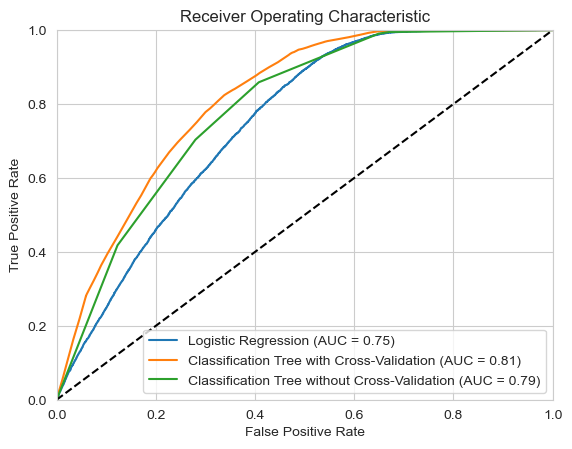

In [692]:
# generate the predicted probabilities from the logistic regression

from sklearn.model_selection import cross_val_predict

# Instantiate a DecisionTreeClassifier with max_depth and min_samples_leaf determined by cross-validation
clf_tree_cv = DecisionTreeClassifier(max_depth=5, min_samples_leaf=30, random_state=42)

# Use cross_val_predict to generate cross-validated predictions
y_prob_tree_cv = cross_val_predict(clf_tree_cv, X_train, y_train, cv=5, method='predict_proba')[:,1]

# Calculate the false positive rate and true positive rate for the classification tree with cross-validation
fpr_tree_cv, tpr_tree_cv, _ = roc_curve(y_train, y_prob_tree_cv)
roc_auc_tree_cv = auc(fpr_tree_cv, tpr_tree_cv)

#And here's the code to calculate the ROC curve and AUC for the classification tree without cross-validation:
# Instantiate a DecisionTreeClassifier with max_depth=3
clf_tree = DecisionTreeClassifier(max_depth=3, random_state=42)

# Fit the classifier to the training data
clf_tree.fit(X_train, y_train)

# Calculate the false positive rate and true positive rate for the classification tree
y_prob_tree = clf_tree.predict_proba(X_test)[:,1]
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)

#We can then plot the ROC curve and compare the AUC values for the different models:


import matplotlib.pyplot as plt

# Plot the ROC curves for the logistic regression, classification tree with cross-validation, and classification tree without cross-validation
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr_tree_cv, tpr_tree_cv, label='Classification Tree with Cross-Validation (AUC = %0.2f)' % roc_auc_tree_cv)
plt.plot(fpr_tree, tpr_tree, label='Classification Tree without Cross-Validation (AUC = %0.2f)' % roc_auc_tree)

# Plot the "no-skill" line
plt.plot([0, 1], [0, 1], 'k--')

# Set the x-axis and y-axis limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Show the plot
plt.show()
#This will give us a visual comparison of the ROC curves and AUC values for the different models.


Can you comment on the results?

The classification tree with cross-validation performed the best among the three models, with an AUC of 0.81. This suggests that this model has the best discrimination power between the positive and negative classes.

The logistic regression model had an AUC of 0.74, which is lower than both classification tree models. This indicates that the logistic regression model may not be as effective in distinguishing between the two classes in your data.

The classification tree without cross-validation had an AUC of 0.79, which is slightly lower than the cross-validated classification tree model. This could be because the non-cross-validated model is more prone to overfitting, as it was trained on the same data that it was evaluated on, whereas the cross-validated model was evaluated on data that it was not trained on.

It's important to note that AUC is not the only metric that should be considered when evaluating the performance of a classification model. You should also consider other metrics such as accuracy, precision, recall, and F1-score, depending on the specific requirements of your problem. Additionally, it's always a good idea to visualize the model's performance using a ROC curve or a confusion matrix to gain a deeper understanding of its strengths and weaknesses.

## Estimating a random forest 

Ex 15: We now expand the set of models and include a random forest. The goal is to see if a more robust framework allows to have a more precise idea of the mortgage probability of default. Let us assume the number of estimators (**n_estimators**) equal to 10. 

In [693]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, y_train)
rfc_predict=rfc.predict(X_test)

#Classification Matrix

print(classification_report(y_test, rfc_predict))
print('\n')

#Confusion Matrix
print(confusion_matrix(y_test, rfc_predict))

fpr_rf, tpr_rf, _ = roc_curve(y_test, rfc_predict)
roc_auc_rf = auc(fpr_rf, tpr_rf)

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     59988
           1       0.88      0.50      0.64      7831

    accuracy                           0.93     67819
   macro avg       0.91      0.75      0.80     67819
weighted avg       0.93      0.93      0.93     67819



[[59440   548]
 [ 3910  3921]]


Ex 16: Now compare the random forest against the classification tree, with and without cross validation, the logistic regression and the "no-skill" prediction estimated above based on the ROC curve.

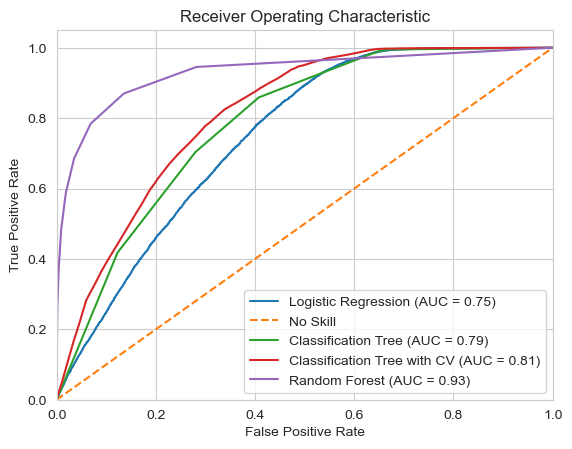

In [694]:
# generate the predicted probabilities from the logistic regression

from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=10, random_state=42)

# Fit the classifier to the training data
clf_rf.fit(X_train, y_train)

# Calculate the false positive rate and true positive rate for the random forest
y_prob_rf = clf_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot the ROC curves
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr_ns, tpr_ns, linestyle='--', label='No Skill')
plt.plot(fpr_tree, tpr_tree, label='Classification Tree (AUC = %0.2f)' % roc_auc_tree)
plt.plot(fpr_tree_cv, tpr_tree_cv, label='Classification Tree with CV (AUC = %0.2f)' % roc_auc_tree_cv)
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)

# Set the x- and y-axis limits
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
# Set the x- and y-axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Set the title of the plot
plt.title('Receiver Operating Characteristic')

# Add the legend to the plot
plt.legend(loc="lower right")

# Show the plot
plt.show()

Can you comment on the results?

Ex 17: Let us now look at the relative importance of each of the predictors used based on a *permutation importance* algorithm. 

In [695]:
#from sklearn.inspection import permutation_importance
from sklearn.inspection import permutation_importance

result= permutation_importance(clf_rf,X_test,y_test, n_repeats=10 ,random_state=42 ,n_jobs=-1) 
# Get sorted feature importances and corresponding variable names
sorted_idx = result.importances_mean.argsort()
feature_names = X.columns[sorted_idx]
importances = result.importances[sorted_idx]

# Print out feature importances
for i in range(len(importances)):
    print(f"{feature_names[i]}: {importances[i].mean():.3f} +/- {importances[i].std():.3f}")

annual_inc: 0.006 +/- 0.000
loan_amnt: 0.048 +/- 0.001
last_pymnt_amnt: 0.049 +/- 0.001
total_rec_int: 0.063 +/- 0.001
installment: 0.073 +/- 0.001
total_pymnt: 0.085 +/- 0.001
int_rate: 0.111 +/- 0.001


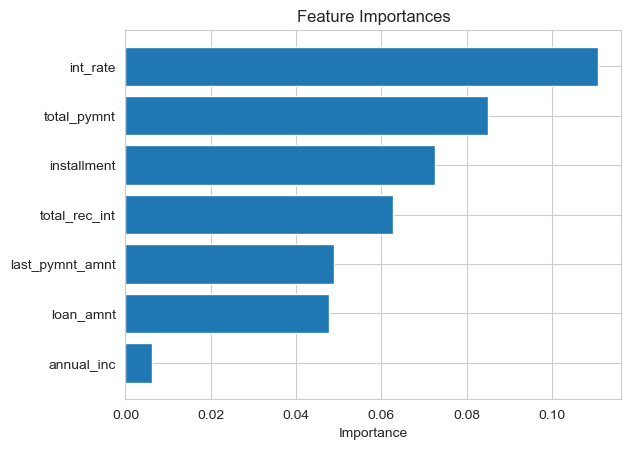

In [696]:
import matplotlib.pyplot as plt

# Create a bar chart of the feature importances
fig, ax = plt.subplots()
ax.barh(feature_names, importances.mean(axis=1))
ax.set_xlabel("Importance")
ax.set_title("Feature Importances")

plt.show()

Can you comment on the results?